In [1]:
import os
os.chdir('../src')

### load getData module

In [2]:
%run modules/data/getData.py

tf.__version__ : 1.13.1
try fetching data..
train_images <class 'numpy.ndarray'> (60000, 28, 28)
train_labels <class 'numpy.ndarray'> (60000,)
test_images <class 'numpy.ndarray'> (10000, 28, 28)
test_labels <class 'numpy.ndarray'> (10000,)


### load getPretrained module

In [3]:
%run modules/model/getPretrained.py

tf.__version__ : 1.13.1
keras.__version__: 2.2.4-tf


### Documentation
Keras documentation: https://keras.io/applications/#vgg16 <br>
Keras code         : https://github.com/keras-team/keras-applications/blob/master/keras_applications/vgg16.py

Neural network in 3D Simulation <br>
https://www.youtube.com/watch?time_continue=87&v=3JQ3hYko51Y

### keys for dataDict = train_images, train_labels, test_images, test_labels

In [4]:
mnistDict = mnistFashion()

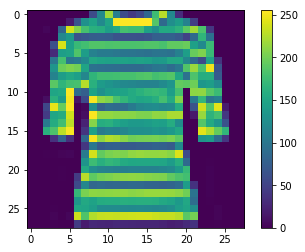

In [5]:
showOneImg(26)

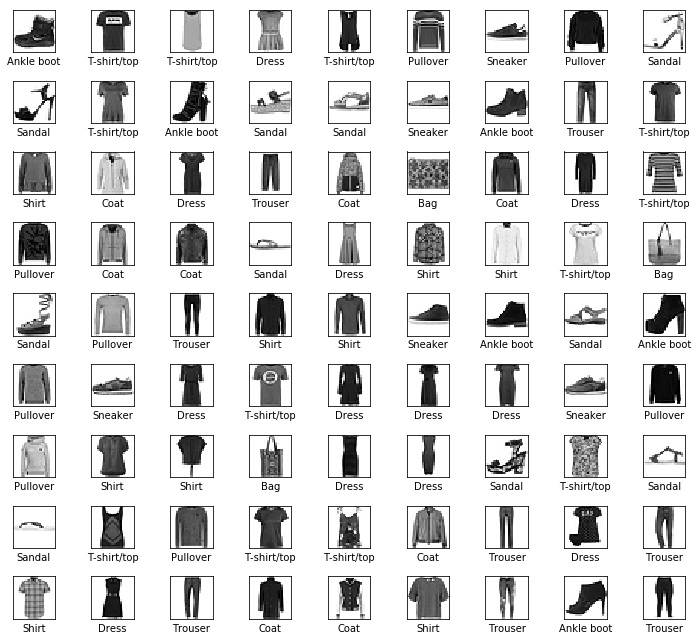

In [6]:
showMultipleImgs(81)

sampleImg.shape (28, 28)


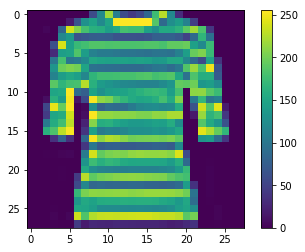

In [7]:
sampleImg      = mnistDict['train_images'][26]
print('sampleImg.shape', sampleImg.shape)
visualiseArray(sampleImg)

ImgResized.shape (56, 56)


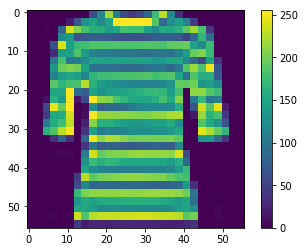

In [8]:
ImgResized     = PIL.Image.fromarray(sampleImg).resize(size=(56, 56))
ImgResized     = np.array( ImgResized )
print('ImgResized.shape', ImgResized.shape)
visualiseArray(ImgResized)

ImgWithchannel.shape (56, 56, 3)


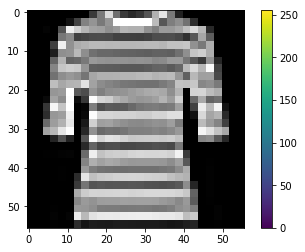

In [9]:
ImgWithchannel = np.stack( [ImgResized] * 3, axis=-1 )
print('ImgWithchannel.shape', ImgWithchannel.shape)
visualiseArray(ImgWithchannel)

In [10]:
inputData      = np.stack( [ImgWithchannel] )
inputData.shape

(1, 56, 56, 3)

In [11]:
ModelFileDict = getModelFileDict()
ModelFileDict

{'Xception': '../models/xception_weights_tf_dim_ordering_tf_kernels_notop.h5',
 'VGG16': '../models/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5',
 'VGG16_includeTop': '../models/vgg16_weights_tf_dim_ordering_tf_kernels.h5',
 'VGG19': '../models/vgg19_weights_tf_dim_ordering_tf_kernels_notop.h5',
 'InceptionV3': '../models/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5',
 'MobileNet': '../models/mobilenet_1_0_224_tf_no_top.h5',
 'DenseNet': '../models/densenet121_weights_tf_dim_ordering_tf_kernels_notop.h5',
 'NASNet': '../models/nasnet_mobile_no_top.h5',
 'ResNet50': '../models/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5',
 'InceptionResNetV2': '../models/inception_resnet_v2_weights_tf_dim_ordering_tf_kernels_notop.h5'}

In [12]:
model = modelImageNet('VGG16', ModelFileDict['VGG16'], input_shape=(56, 56, 3))

Instructions for updating:
Colocations handled automatically by placer.


In [13]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 56, 56, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 56, 56, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 56, 56, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 28, 28, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 28, 28, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 28, 28, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 14, 14, 128)       0         
__________

In [14]:
model.layers

In [15]:
listOfTensorflowObject = tf.get_collection(tf.GraphKeys.GLOBAL_VARIABLES)
listOfTensorflowObject

[<tf.Variable 'block1_conv1/kernel:0' shape=(3, 3, 3, 64) dtype=float32>,
 <tf.Variable 'block1_conv1/bias:0' shape=(64,) dtype=float32>,
 <tf.Variable 'block1_conv2/kernel:0' shape=(3, 3, 64, 64) dtype=float32>,
 <tf.Variable 'block1_conv2/bias:0' shape=(64,) dtype=float32>,
 <tf.Variable 'block2_conv1/kernel:0' shape=(3, 3, 64, 128) dtype=float32>,
 <tf.Variable 'block2_conv1/bias:0' shape=(128,) dtype=float32>,
 <tf.Variable 'block2_conv2/kernel:0' shape=(3, 3, 128, 128) dtype=float32>,
 <tf.Variable 'block2_conv2/bias:0' shape=(128,) dtype=float32>,
 <tf.Variable 'block3_conv1/kernel:0' shape=(3, 3, 128, 256) dtype=float32>,
 <tf.Variable 'block3_conv1/bias:0' shape=(256,) dtype=float32>,
 <tf.Variable 'block3_conv2/kernel:0' shape=(3, 3, 256, 256) dtype=float32>,
 <tf.Variable 'block3_conv2/bias:0' shape=(256,) dtype=float32>,
 <tf.Variable 'block3_conv3/kernel:0' shape=(3, 3, 256, 256) dtype=float32>,
 <tf.Variable 'block3_conv3/bias:0' shape=(256,) dtype=float32>,
 <tf.Variable 

In [16]:
print( [layer.name for layer in model.layers ] )

['input_1', 'block1_conv1', 'block1_conv2', 'block1_pool', 'block2_conv1', 'block2_conv2', 'block2_pool', 'block3_conv1', 'block3_conv2', 'block3_conv3', 'block3_pool', 'block4_conv1', 'block4_conv2', 'block4_conv3', 'block4_pool', 'block5_conv1', 'block5_conv2', 'block5_conv3', 'block5_pool']


In [17]:
outputNodes = []

for layer in model.layers:
    print('-'*50)
    print('layer: {}'.format(layer.name))
    print(layer)
    print(layer.output)
    print('')
    outputNodes.append( layer.output.name )

--------------------------------------------------
layer: input_1
Tensor("input_1:0", shape=(?, 56, 56, 3), dtype=float32)

--------------------------------------------------
layer: block1_conv1
Tensor("block1_conv1/Relu:0", shape=(?, 56, 56, 64), dtype=float32)

--------------------------------------------------
layer: block1_conv2
Tensor("block1_conv2/Relu:0", shape=(?, 56, 56, 64), dtype=float32)

--------------------------------------------------
layer: block1_pool
Tensor("block1_pool/MaxPool:0", shape=(?, 28, 28, 64), dtype=float32)

--------------------------------------------------
layer: block2_conv1
Tensor("block2_conv1/Relu:0", shape=(?, 28, 28, 128), dtype=float32)

--------------------------------------------------
layer: block2_conv2
Tensor("block2_conv2/Relu:0", shape=(?, 28, 28, 128), dtype=float32)

--------------------------------------------------
layer: block2_pool
Tensor("block2_pool/MaxPool:0", shape=(?, 14, 14, 128), dtype=float32)

-------------------------------

In [18]:
outputNodes

['input_1:0',
 'block1_conv1/Relu:0',
 'block1_conv2/Relu:0',
 'block1_pool/MaxPool:0',
 'block2_conv1/Relu:0',
 'block2_conv2/Relu:0',
 'block2_pool/MaxPool:0',
 'block3_conv1/Relu:0',
 'block3_conv2/Relu:0',
 'block3_conv3/Relu:0',
 'block3_pool/MaxPool:0',
 'block4_conv1/Relu:0',
 'block4_conv2/Relu:0',
 'block4_conv3/Relu:0',
 'block4_pool/MaxPool:0',
 'block5_conv1/Relu:0',
 'block5_conv2/Relu:0',
 'block5_conv3/Relu:0',
 'block5_pool/MaxPool:0']

In [19]:
saver          = tf.train.Saver(var_list=tf.trainable_variables())
checkPoint     = '../notebooks/model_checkpoints/tutorial5/vgg16_model.ckpt'
model.save_weights( checkPoint )

Instructions for updating:
Use tf.train.CheckpointManager to manage checkpoints rather than manually editing the Checkpoint proto.


In [20]:
sess   = tf.Session()
sess.run(tf.global_variables_initializer())

saver.restore(sess, checkPoint)

Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from ../notebooks/model_checkpoints/tutorial5/vgg16_model.ckpt
INFO:tensorflow:Restoring parameters from ../notebooks/model_checkpoints/tutorial5/vgg16_model.ckpt


--------------------------------------------------
node: block1_conv1/Relu:0; shape: (56, 56, 64)


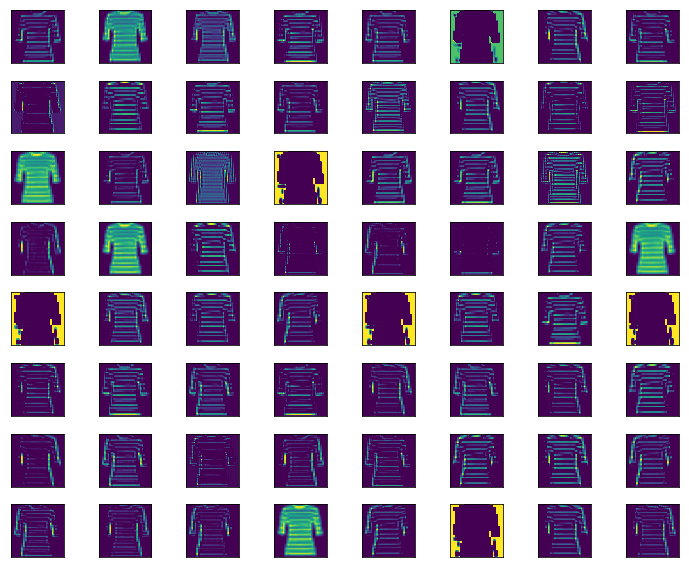

--------------------------------------------------
node: block1_conv2/Relu:0; shape: (56, 56, 64)


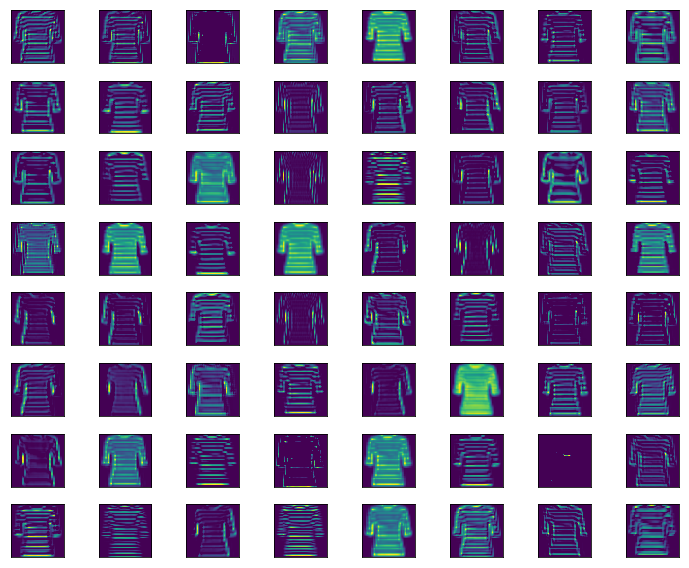

--------------------------------------------------
node: block1_pool/MaxPool:0; shape: (28, 28, 64)


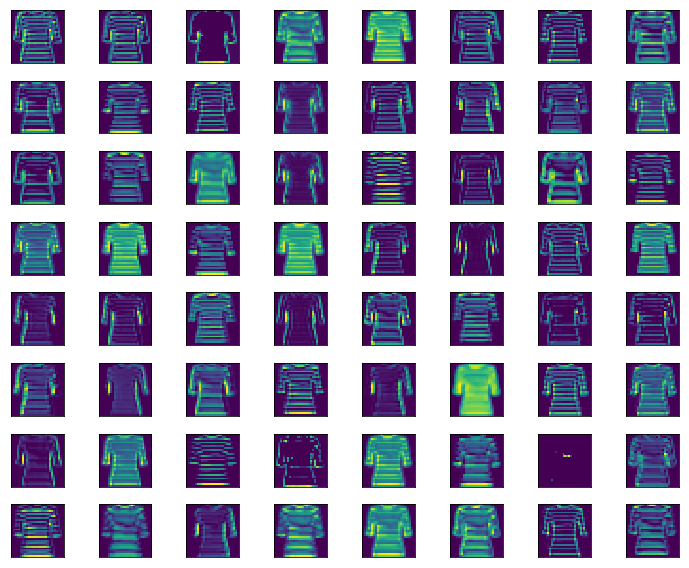

--------------------------------------------------
node: block2_conv1/Relu:0; shape: (28, 28, 128)


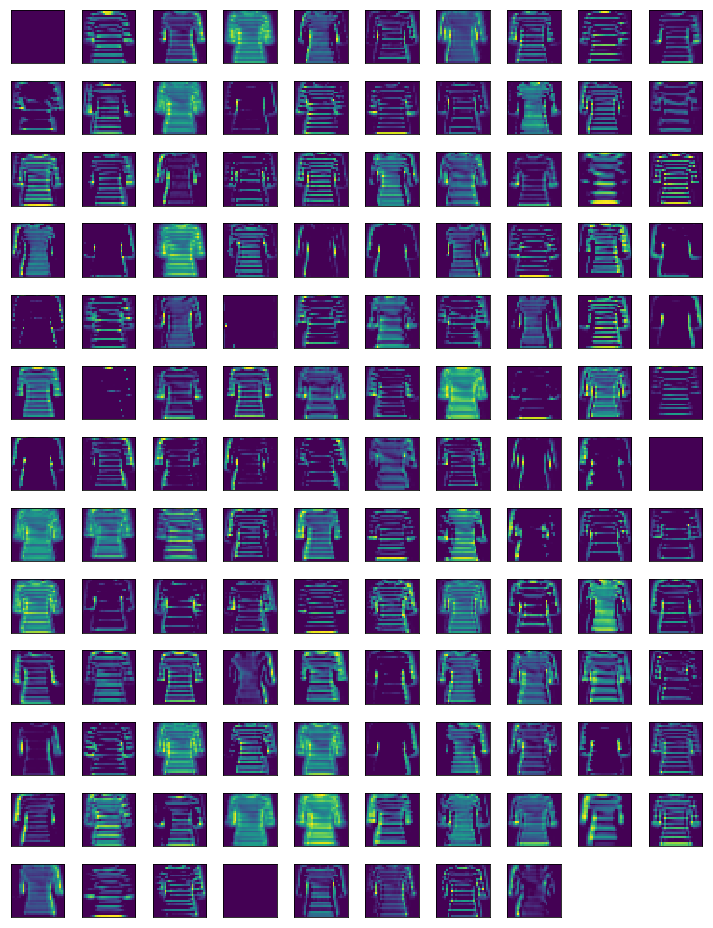

--------------------------------------------------
node: block2_conv2/Relu:0; shape: (28, 28, 128)


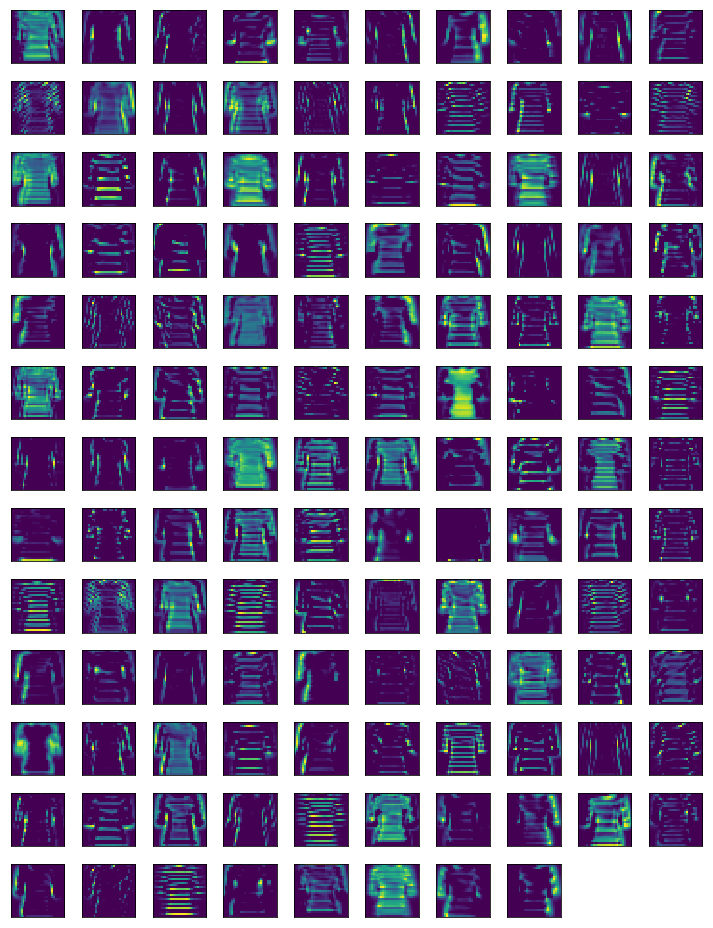

--------------------------------------------------
node: block2_pool/MaxPool:0; shape: (14, 14, 128)


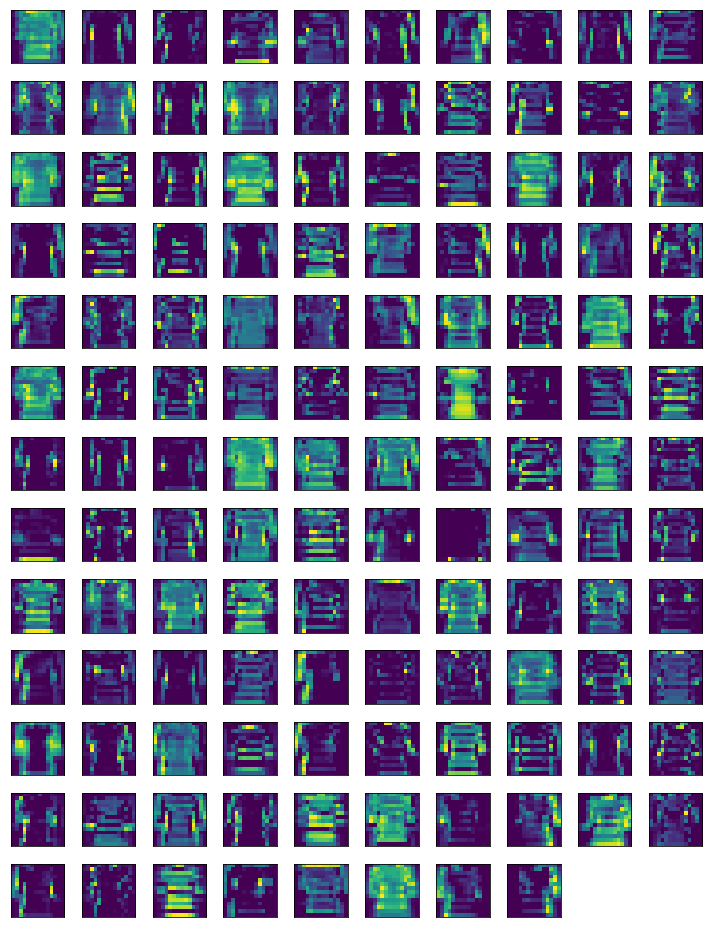

--------------------------------------------------
node: block3_conv1/Relu:0; shape: (14, 14, 256)


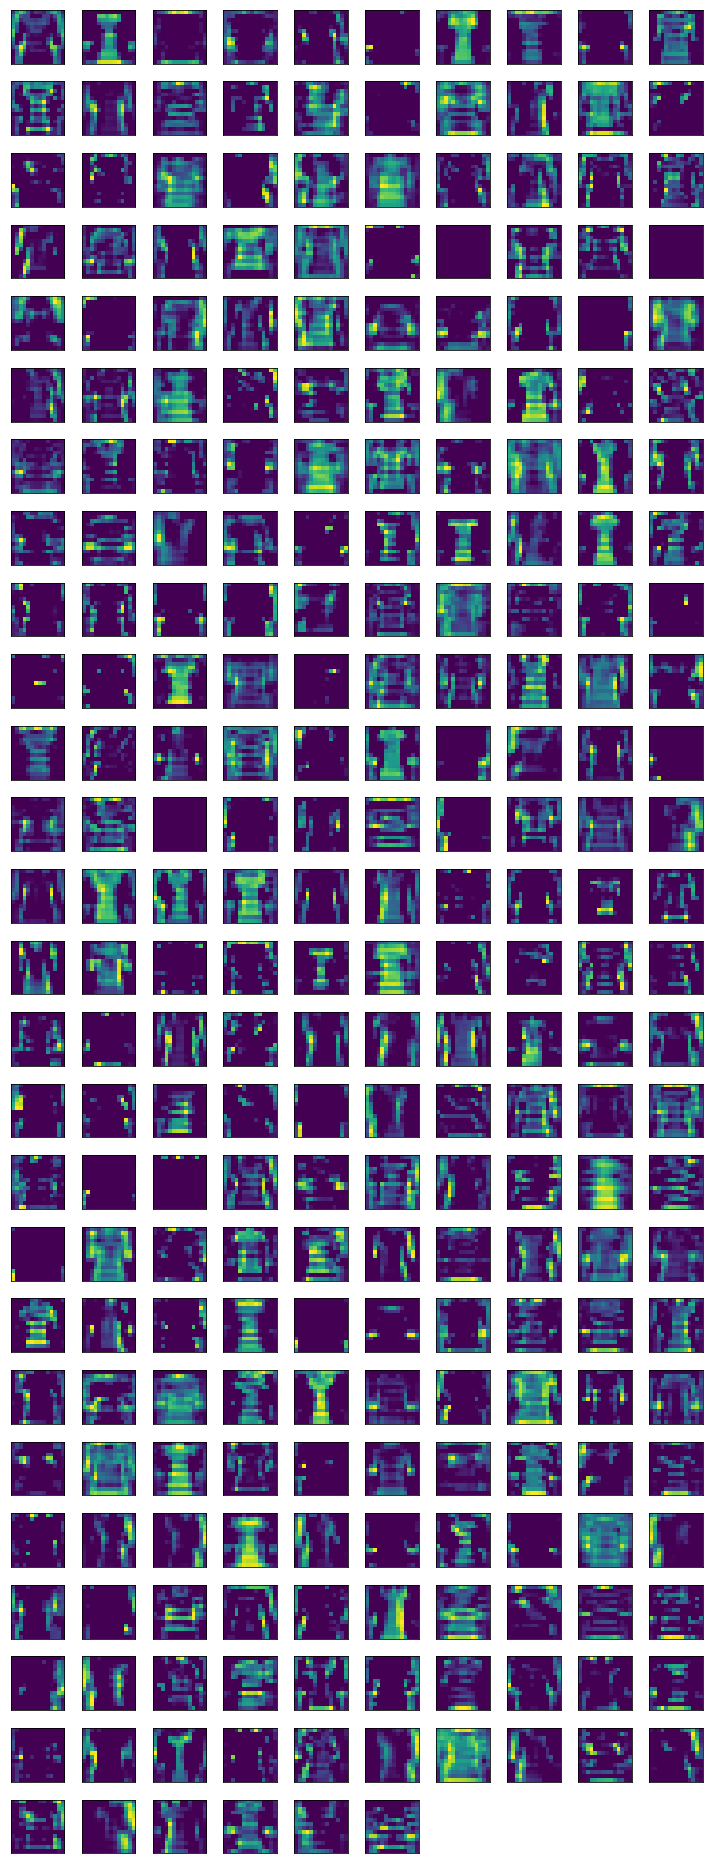

--------------------------------------------------
node: block3_conv2/Relu:0; shape: (14, 14, 256)


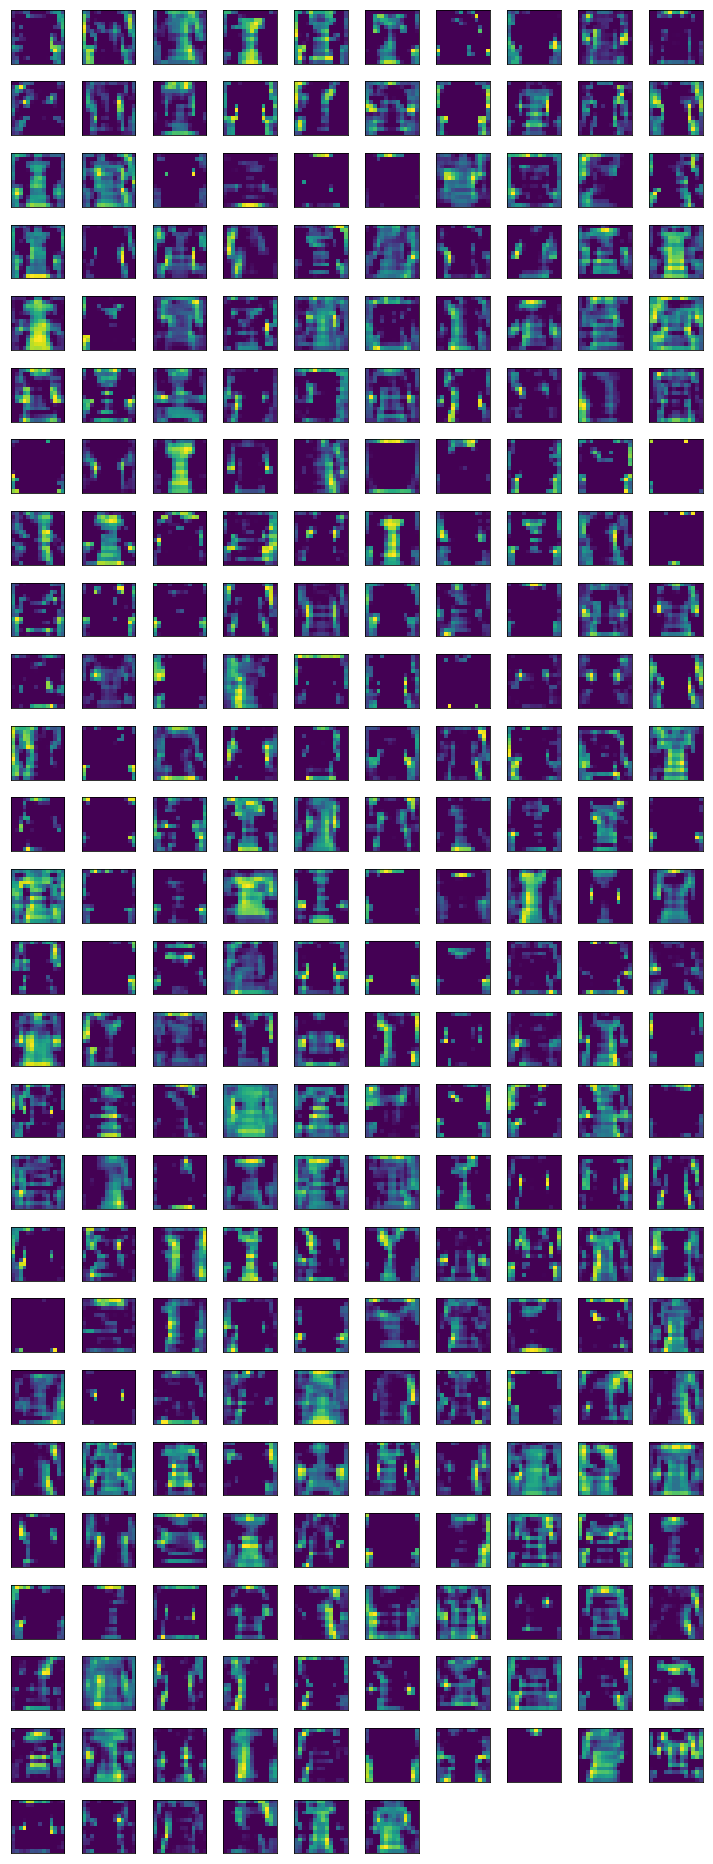

--------------------------------------------------
node: block3_conv3/Relu:0; shape: (14, 14, 256)


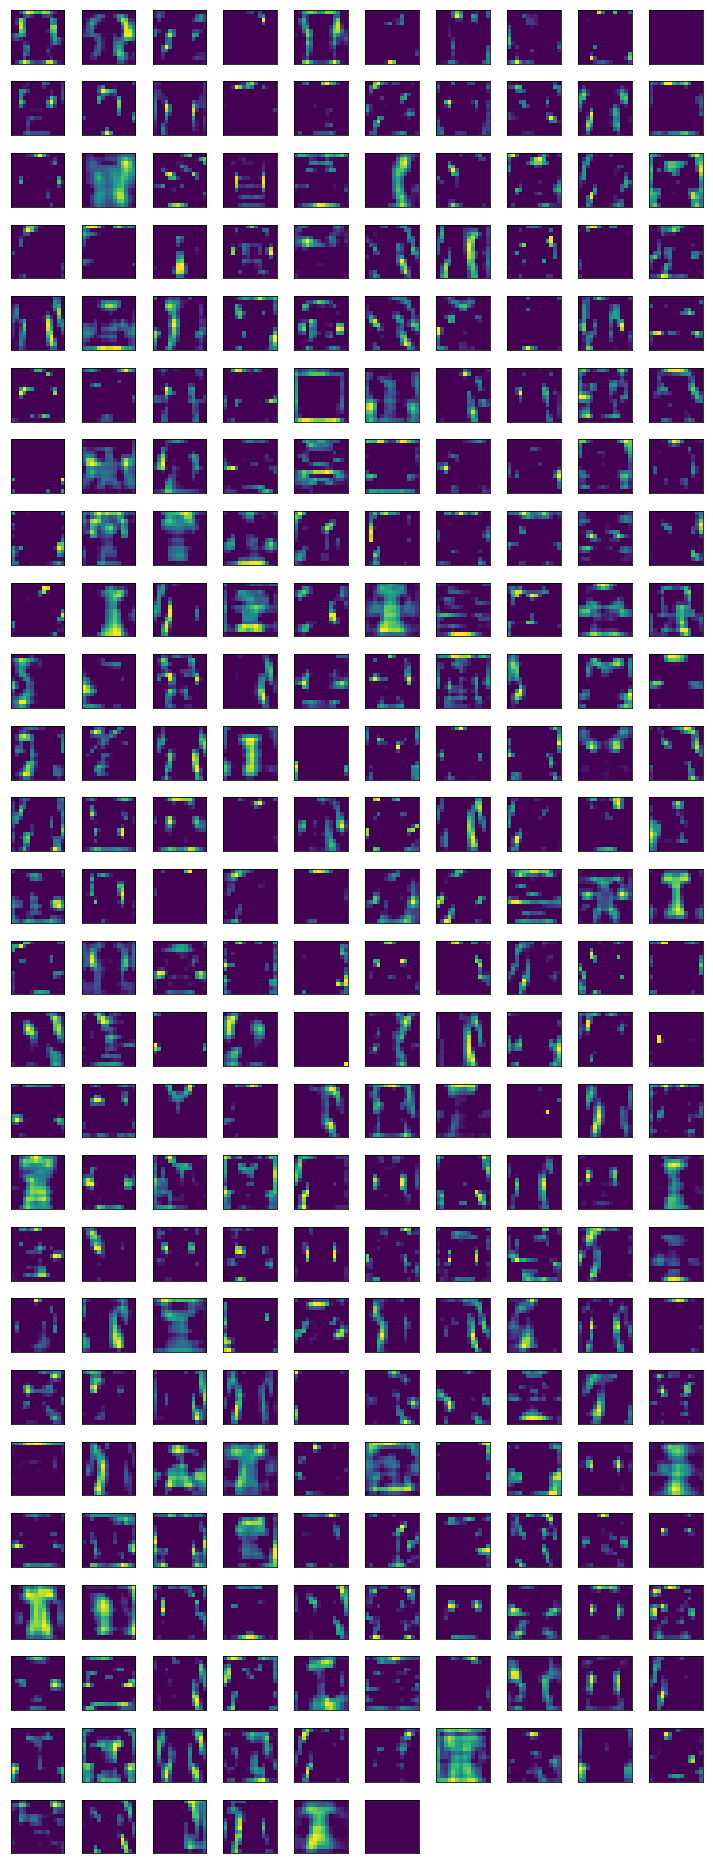

--------------------------------------------------
node: block3_pool/MaxPool:0; shape: (7, 7, 256)


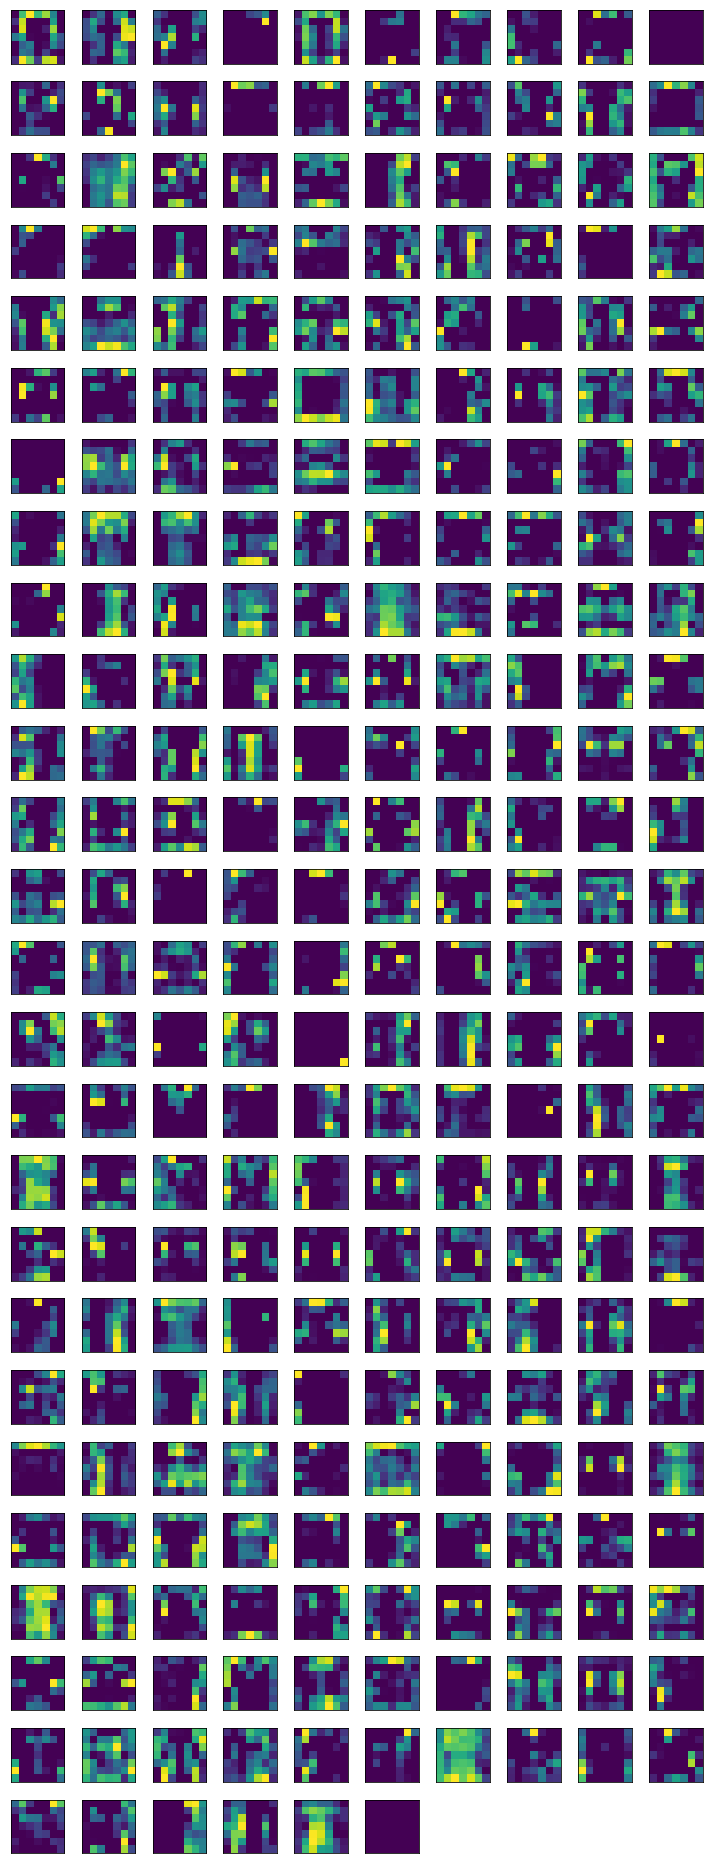

--------------------------------------------------
node: block4_conv1/Relu:0; shape: (7, 7, 512)


In [ ]:
visualise_layers(sess, outputNodes[1:-1], inputData)